<div style="text-align:center"><a href="https://colab.research.google.com/github/PexMor/jupyter-playground/blob/main/ExponentialNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<br/>
<a style="display:inline-block" href="https://github.com/PexMor/jupyter-playground/blob/main/ExponentialNumpy.ipynb" target="_parent"><img alt="GitHub forks" src="https://img.shields.io/github/forks/PexMor/jupyter-playground?label=fork%20me&logo=github&style=plastic"></a></div>

In [1]:
!pip -q install -U watermark ipympl ipywidgets mpld3 sympy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ipywidgets as widgets
import mpld3
import sympy
import math

# The following code should be placed into sep file sm_md.py to be reused
# from sm_md import *
# but on online environments it might not always work to load private module in python
from IPython.display import Math
from IPython.display import Markdown
import tensorflow as tf
import torch
import numpy as np

def sm_md(inmat):
    md = ""
    md += "\\begin{bmatrix}"
    tmp_rows = list()
    mat = inmat
    # Pythonify the TensorFlow
    if isinstance(inmat,tf.Variable):
        mat = inmat.numpy().tolist()
    # Pythonify the Numpy and PyTorch
    if isinstance(inmat,(torch.Tensor,np.ndarray)):
        mat = inmat.tolist()
    for rr in range(len(mat)):
        tmp_rows.append(" & ".join([(f'{item:.2f}').rstrip('0').rstrip('.') for item in mat[rr]]))
    md += "\\\\".join(tmp_rows)
    md += "\\end{bmatrix}"
    return display(Markdown(md))


In [3]:
%load_ext watermark
%watermark -iv -i -z -u -m -w
%config InlineBackend.figure_formats = ['svg']
%matplotlib ipympl
%matplotlib inline

Last updated: 2021-08-18T14:20:59.149337+02:00

Compiler    : Clang 12.0.5 (clang-1205.0.22.9)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

torch     : 1.9.0
numpy     : 1.19.5
ipywidgets: 7.6.3
matplotlib: 3.4.2
mpld3     : 0.5.5
tensorflow: 2.5.0
sympy     : 1.8

Watermark: 2.2.0



In [4]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))

In [5]:
from IPython.display import YouTubeVideo
with out:
    display(YouTubeVideo('eWzY2nGfkXk'))

In [6]:
out = widgets.Output(layout={'border': '1px solid black'})
out.append_stdout('Output appended with append_stdout')
out.append_display_data(YouTubeVideo('eWzY2nGfkXk'))
out

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'stream', 'name': 'stdout', 'text': '…

In [7]:
a = widgets.IntSlider(description='a', start=0, end=100, step=2, value=42)
b = widgets.IntSlider(description='b', start=0, end=100, step=2, value=42)
c = widgets.IntSlider(description='c', start=0, end=100, step=2, value=42)

def f(a, b, c):
    global v_a,v_b,v_c
    v_a = a
    v_b = b
    v_c = c
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

In [8]:
v_a

42

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
rng = np.random.default_rng(seed=42)
m2d_flt = rng.random((3, 3))

In [11]:
sm_md(m2d_flt)

\begin{bmatrix}0.77 & 0.44 & 0.86\\0.7 & 0.09 & 0.98\\0.76 & 0.79 & 0.13\end{bmatrix}

In [12]:
y = np.linalg.inv(m2d_flt)
sm_md(y)

\begin{bmatrix}-6.76 & 5.54 & 3.11\\5.85 & -4.97 & -1.4\\4.27 & -2.46 & -2.09\end{bmatrix}

In [13]:
# add 0.0001 to prevent display of -0
z = np.dot(m2d_flt,y) + 0.0000001
sm_md(z)

\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix}

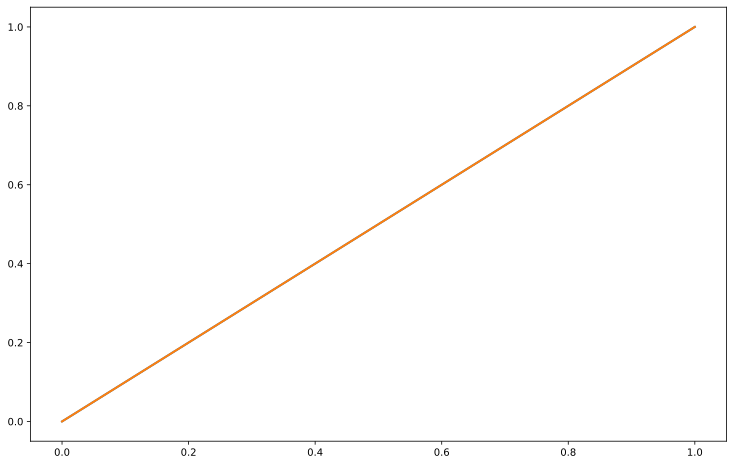

In [14]:
mpld3.enable_notebook()
plt.rcParams['figure.figsize']=[12.5,8]
data = [[0,0],[1,1]]
plt.plot(data,linewidth=2,label="Random...")
plt.show()

In [15]:
g_ar = None
def get_ar():
    global g_ar
    if g_ar is None:
        (fig_w, fig_h) = plt.rcParams['figure.figsize']
        left, right = plt.xlim()
        bottom, top = plt.ylim()
        scale_x = fig_w / (right - left)
        scale_y = fig_h / (top - bottom)
        g_ar = scale_x / scale_y
        print(f"aspect ratio = {g_ar}")
    return g_ar

def fixp(p):
    ar = get_ar()
    return [p[0],p[1]*ar]

def unfixp(p):
    ar = get_ar()
    return [p[0],p[1]/ar]

In [16]:
no_tan = 10
x_start = 0.1
x_end = 20.0 + x_start
no_points = 100
epsilon = 0.0
scale_norm = 10
scale_tan = 0.5

class Vec(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
x_fce_d = {}
x_fce_d["ln"] = {}
x_fce_d["ln"]["fce"] = lambda x: np.log(x+epsilon)
x_fce_d["ln"]["dfce"] = lambda x: 1/(x+epsilon)
fsel = "ln"
x_fce_d["x2"] = {}
x_fce_d["x2"]["fce"] = lambda x: x**2
x_fce_d["x2"]["dfce"] = lambda x: 2*x
fsel = "x2"
x_fce_d["sin"] = {}
x_fce_d["sin"]["fce"] = lambda x: np.sin(x/4)
x_fce_d["sin"]["dfce"] = lambda x: np.cos(x/4)/4
fsel = "sin"
x_fce_d["e"] = {}
x_fce_d["e"]["fce"] = lambda x: np.exp(x)
x_fce_d["e"]["dfce"] = lambda x: np.exp(x)
fsel = "e"
x_fce_d["x3"] = {}
x_fce_d["x3"]["fce"] = lambda x: x**3+x**2
x_fce_d["x3"]["dfce"] = lambda x: 3*x**2+2*x
fsel = "x3"

fsel = "ln"

fix_ar = True

def f(x):
    global fsel, x_fce_d
    return x_fce_d[fsel]["fce"](x)

def slope(x): 
    global fsel, x_fce_d
    return x_fce_d[fsel]["dfce"](x)

def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

def two_points(x,y):
    delta_y = np.arctan( slope(x) ) / scale_norm
    delta_x = - np.arctan( slope(x) ) / scale_norm
    p_start = [ x - delta_x, x + delta_x ]
    p_end = [ y - delta_y, y + delta_y ]
    return [p_start,p_end]

def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def vec_at(x,y):
    global fix_ar
    tan = ( 1, slope(x))
    tan_norm = normalize(tan)
    # fix with respect to aspect ratio
    if fix_ar:
        tan_norm = fixp(normalize(unfixp(tan)))
    norm = perpendicular(tan_norm)
    # fix with respect to aspect ratio
    if fix_ar:
        norm = fixp(perpendicular(unfixp(tan_norm)))
    n_tan = Vec( tan_norm[0], tan_norm[1])
    n_norm = Vec( norm[0], norm[1] )
    return (n_tan,n_norm)

def norm_ortho(v):
    v_norm = normalize(v)
    norm = perpendicular(v_norm)
    return norm

x = np.linspace(x_start, x_end, no_points)
y = f(x)
dy = 1/x

aspect ratio = 0.5303304908059076


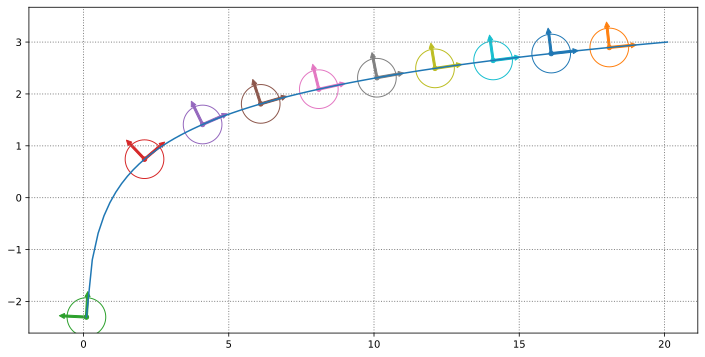

In [17]:
def fix_demo(fig_w,fig_h,fix_ar=True,set_fsel="ln"):
    global fsel, g_ar
    fsel = set_fsel
    plt.rcParams['figure.figsize']=[fig_w,fig_h]
    fig, ax = plt.subplots()
    plt.grid(color='gray', linestyle='dotted', linewidth=1)
    fix_ar = True
    if not fix_ar:
        ax.set_aspect('equal',anchor='C')
    plt.plot(x,f(x))
    g_ar = None
    get_ar()
    for xx in range(no_tan):
        x1 = 1.0 * xx * (x_end - x_start) / no_tan + x_start
        y1 = f(x1)
        (n_tan,n_norm) = vec_at(x1,y1)
        arrow = mpatches.FancyArrowPatch((x1,y1),(x1+n_tan.x,y1+n_tan.y), mutation_scale=10,color=f"C{xx+2}")
        ax.add_patch(arrow)
        arrow = mpatches.FancyArrowPatch((x1,y1),(x1+n_norm.x,y1+n_norm.y), mutation_scale=10,color=f"C{xx+2}")
        ax.add_patch(arrow)
        plt.scatter(x1, y1, marker="o", s=1500, facecolors='none', edgecolors=f"C{xx+2}")
        plt.scatter(x1, y1, marker="o", s=20, color=f"C{xx+2}")
    plt.show()
fix_demo(12,6,fix_ar=False)

aspect ratio = 0.5303304908059076


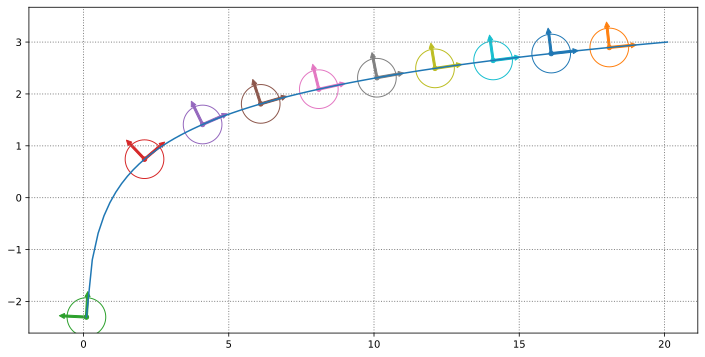

In [18]:
fix_demo(12,6)

aspect ratio = 0.2651652454029538


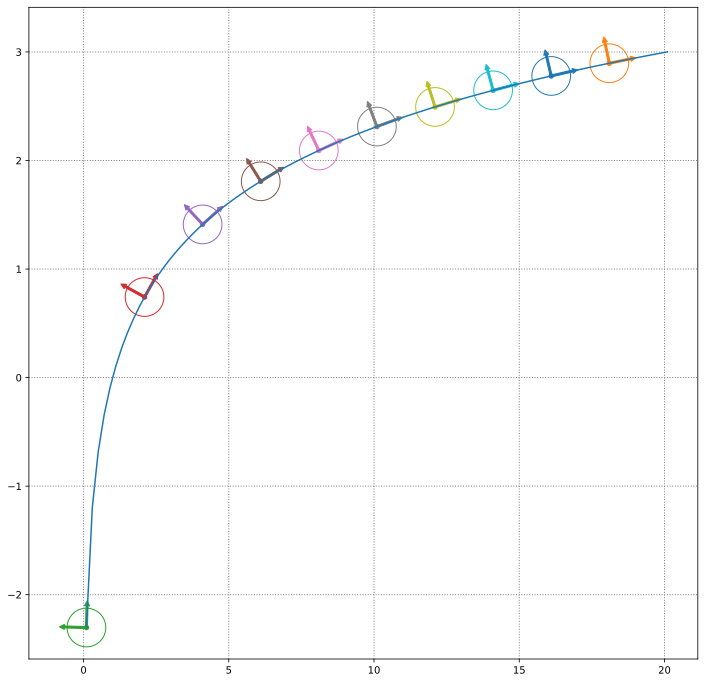

In [19]:
fix_demo(12,12)

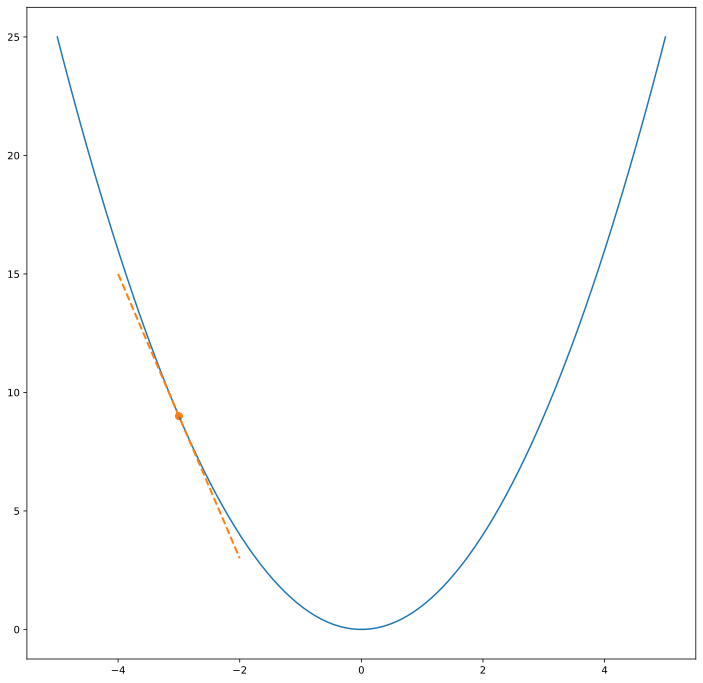

In [20]:
# Define parabola
def f(x): 
    return x**2

# Define parabola derivative
def slope(x): 
    return 2*x

# Define x data range for parabola
x = np.linspace(-5,5,100)

# Choose point to plot tangent line
x1 = -3
y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
plt.figure()
plt.plot(x, f(x))
plt.scatter(x1, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)

In [21]:
#%config InlineBackend.figure_formats = ['png']
%config InlineBackend.figure_formats = ['svg']
g_ratio = None
def get_ratio(ax):
    global g_ratio
    if g_ratio is None:
        (fig_w, fig_h) = plt.rcParams['figure.figsize']
        left, right = plt.xlim()
        bottom, top = plt.ylim()
        scale_x = fig_w / (right - left)
        scale_y = fig_h / (top - bottom)
        g_ratio = scale_x / scale_y
        print(f"g_ratio = {g_ratio}")
    return g_ratio

def rplot(ax,a,d,color="C1"):
    angle = np.arctan2(d[1],d[0]) * 180 / np.pi
    # ax.text(a[0],a[1],f"{angle:.0f}",{'ha': 'center', 'va': 'center'},rotation=angle)#,color=color)
    ax.plot([a[0],a[0]+d[0]],[a[1],a[1]+d[1]],color=color)
    # ax.arrow(a[0],a[1],d[0],d[1],head_width=0.5, head_length=0.5,linewidth=2, color=color)

def vplot(ax,a,d,color="C1"):
    ax.plot([a[0],a[0]+d[0]],[a[1],a[1]+d[1]],color=color)

def do_plot(a_arr,d_arr):
    global g_ratio, g_ar
    fig, ax = plt.subplots()
    plt.grid(color='r', linestyle='dotted', linewidth=1)
    # ax.set_aspect('equal')#,anchor='C')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    g_ratio = None
    g_ar = None
    for ii in range(len(a_arr)):
        a = a_arr[ii]
        d = d_arr[ii]
        vplot(ax,a,d,color=f"C{ii+2}")
        n = fixp(normalize(unfixp(d)))
        o = fixp(norm_ortho(unfixp(d)))
        rplot(ax,a,n)
        rplot(ax,a,o)
        ax.scatter(a[0],a[1],s=1000, facecolors='none', edgecolors=f"C{ii+2}", linewidth=1, linestyle='dotted')
    plt.show()

In [22]:
fixgeo = True
a_arr = [[-10,-10],[-10,10],[10,10],[10,-10]]
d_arr = [[5,5],[3,7],[-7,3],[3,-7]]

aspect ratio = 1.0


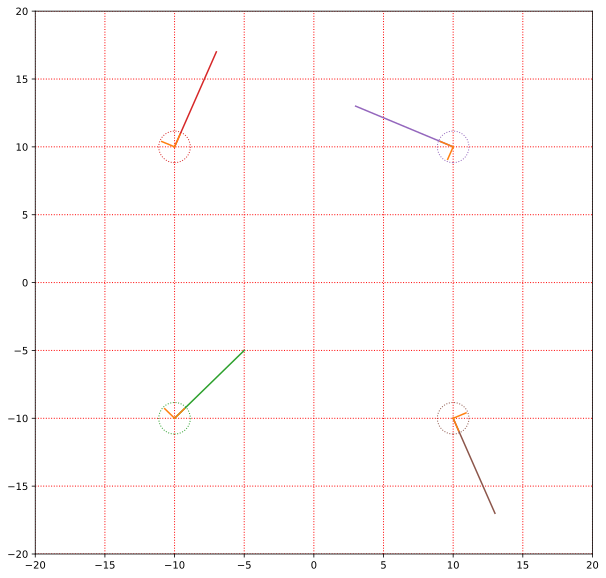

In [23]:
plt.rcParams['figure.figsize']=[10,10]
do_plot(a_arr,d_arr)

aspect ratio = 3.3333333333333335


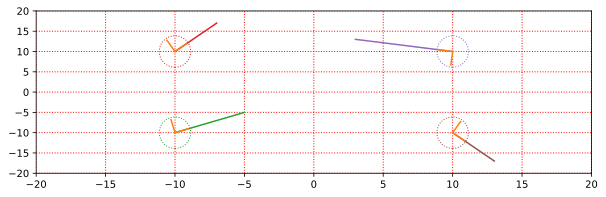

In [24]:
plt.rcParams['figure.figsize']=[10,3]
do_plot(a_arr,d_arr)

aspect ratio = 0.6666666666666666


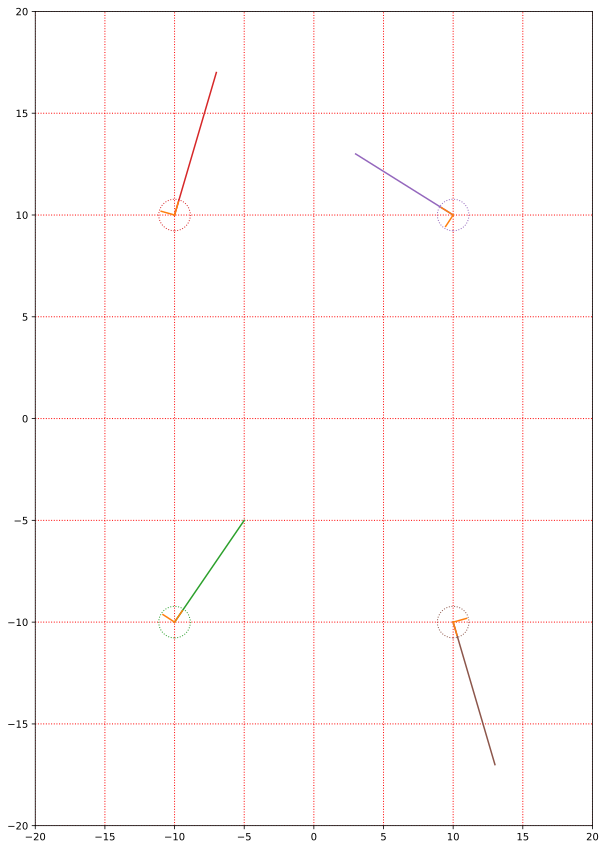

In [25]:
plt.rcParams['figure.figsize']=[10,15]
do_plot(a_arr,d_arr)

aspect ratio = 1.5000000000000002


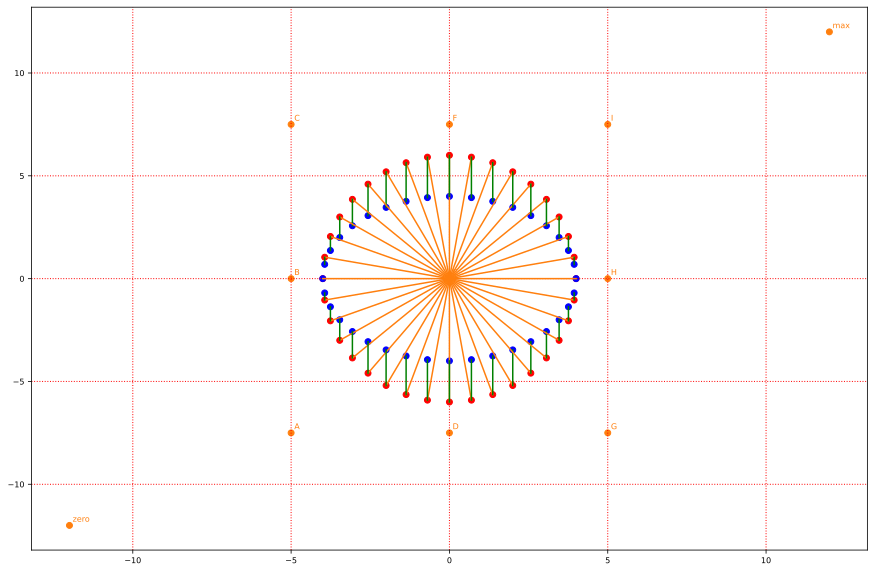

In [26]:
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['figure.figsize']=[15,10]
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
# plt.tick_params(labelsize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
def lplot(ax,pax,pbx,color="C1"):
    a = fixp(pax)
    b = fixp(pbx)
    ax.plot([a[0],b[0]],[a[1],b[1]],color=color)

def adj_plot(ax,p,color="C1"):
    a = fixp(p)
    b = p
    ax.plot([a[0],b[0]],[a[1],b[1]],color=color)
    
def pplot(ax,px,name,color="C1",prop={'ha': 'left', 'va': 'bottom'},hide_point=False,hide_text=False):
    p = fixp(px)
    if not hide_point:
        ax.scatter(p[0],p[1],marker="o",color=color)
    teps = 0.1
    if not hide_text:
        ax.text(p[0]+teps,p[1]+teps,name,prop,color=color)

def tpplot(ax,p,name,color="C1",prop={'ha': 'left', 'va': 'bottom'},hide_point=False,hide_text=False):
    if not hide_point:
        ax.scatter(p[0],p[1],marker="o",color=color)
    teps = 0.1
    if not hide_text:
        ax.text(p[0]+teps,p[1]+teps,name,prop,color=color)

def fake_plot():
    global g_ar
    g_ar = None
    fig, ax = plt.subplots()
    plt.grid(color='r', linestyle='dotted', linewidth=1)
    pts = []
    npts = {}
    sp=12
    tpplot(ax,[-sp,-sp],"zero")
    tpplot(ax,[sp,sp],"max")
    for xx in range(3):
        for yy in range(3):
            pt=[xx*5.0-5.0,yy*5.0-5.0]
            name = chr(65+xx*3+yy)
            pplot(ax,pt,name)
            npts[name] = pt
            pt.append(pt)
    dia = 4.0
    no_ang = 36
    for ang in range(no_ang):
        angle = 360.0 * ang / no_ang
        rad = angle * math.pi / 180
        xx = dia * math.cos(rad)
        yy = dia * math.sin(rad)
        lplot(ax,npts['E'],[xx,yy])
        adj_plot(ax,[xx,yy],color="green")
        pplot(ax,[xx,yy],f"{angle:.1f}",prop={'ha': 'center', 'va': 'center'},hide_text=True,color='r')
        tpplot(ax,[xx,yy],f"{angle:.1f}",prop={'ha': 'center', 'va': 'center'},hide_text=True,color='b')
fake_plot()